# Machine Learning in Python - Group Project 2

**Due Friday, April 14th by 16.00 pm.**

Contributor Names:

Qiming Xiong (UUN: s2442309)

Yifan Wu (UUN: s2316499)

Jiaqi Zhou (UUN: s2318871)

## General Setup

In [1]:
# Add any additional libraries or submodules below
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import pycountry_convert as pc
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# sklearn modules
import sklearn

In [3]:
# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

In [64]:
# Load data
d = pd.read_csv("hotel.csv")

In [5]:
d.head()

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Resort Hotel,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,0,Resort Hotel,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,0,Resort Hotel,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,0,Resort Hotel,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,0,Resort Hotel,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


## 1. Introduction

In this report, we are going to present our analysis of the Hotel Booking Demand dataset, which is provided by a large hotel
operator, scontains anonymized hotel booking data from two kinds of hotels: resort and city. Our task is to understand why customers cancel their reservationdevelop, analyse the potential features that may influencethe result, and build a model that can predict the likelihood of a booking being canceled based on various features. To accomplish this task, we applied several machine learning algorithms such as logistic regression, decision tree, KNN, and random forest, and ultimately chose the random forest model due to its high accuracy and performance.  

We started our analysis by performing exploratory data analysis, contains an exploration of the raw data.We dealt with missing data in the dataset, cleaned up some data that didn't make sense in reality, and did a number of meaningful data visualisations to help the client get a basic idea of the data. Then, we performed extensive feature engineering on the dataset, including feature transforming, feature generation and feature selection. We then split the dataset into training and testing sets, and applied various machine learning algorithms to predict the likelihood of a booking being canceled. After comparing the performance of these models, we chose the random forest model, which had the highest accuracy and F1 score.  

We also conducted feature importance analysis to determine the most important features for predicting booking cancellations. Our analysis revealed that the most important features were deposit type, number of special requests, whether the reseved room type is the same as assigned room type, agent, number of car parking spaces,customer type,lead time, market segment and seasons. These insights could be useful for hotel management in predicting and managing their booking cancellations.  

Our analysis of the Hotel Booking Demand dataset showed that machine learning algorithms such as random forest can be effective in predicting hotel booking cancellations. By conducting feature engineering and selecting the appropriate algorithm, we were able to achieve high accuracy and performance. Our feature importance analysis also provided valuable insights for hotel management, which can help them optimize their revenue management strategies and reduce the impact of cancellations on their business.

## 2. Exploratory Data Analysis and Feature Engineering

### Exploratory Data Analysis

Let's start with checking the missing values.

In [6]:
# Detect missing values
d.isnull().sum()[d.isnull().sum()!=0]/d.shape[0]

children    0.000034
country     0.004087
agent       0.136862
company     0.943069
dtype: float64

We can see that the proportion of missing values in column company is as high as 94%, so we will directly delete this column. The columns of children, country and agent have a relatively low proportion of missing values, so we directly delete the rows with missing values.

In [7]:
# Delete the rows with missing values
d.dropna(subset=['children','country','agent'],inplace=True)

In [8]:
# Delete column company
d.drop(['company'],axis =1,inplace=True)

Now let's see what values each variable contains

In [9]:
# Explore what values each variable contains
pd.DataFrame([[col,d[col].unique(),len(d[col].unique()),\
               type(d[col].unique()[0])] for col in d])

,0,1,2,3
0,is_canceled,"[0, 1]",2,<class 'numpy.int64'>
1,hotel,"[Resort Hotel, City Hotel]",2,<class 'str'>
2,lead_time,"[13, 14, 9, 85, 75, 23, 35, 68, 18, 37, 12, 7,...",475,<class 'numpy.int64'>
3,arrival_date_year,"[2015, 2016, 2017]",3,<class 'numpy.int64'>
4,arrival_date_month,"[July, August, September, October, November, D...",12,<class 'str'>
5,arrival_date_week_number,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...",53,<class 'numpy.int64'>
6,arrival_date_day_of_month,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",31,<class 'numpy.int64'>
7,stays_in_weekend_nights,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 10,...",15,<class 'numpy.int64'>
8,stays_in_week_nights,"[1, 2, 3, 4, 5, 11, 8, 10, 6, 7, 15, 0, 9, 12,...",30,<class 'numpy.int64'>
9,adults,"[1, 2, 3, 26, 0, 4]",6,<class 'numpy.int64'>


First, we remove variables which are clearly irrational.
- It is obviously unreasonable to have `stays_in_weekend_nights` and `stays_in_week_nights` both be 0;
- The number of `adults` guests should not be 0;
- `meal`：SC and undefined mean the same thing, so it is better to change 'undefined' into 'SC';
- Change the type of `children` variable from float to int;
- Change the type of `agent` variable from float to str;
- Change the type of `arrival_date_year` variable to str;
- Delete the extreme value of `adult`，`children` and `baby`;
- Delete variables that cannot be known in advance: `booking_changes` and `adr`;
- `arrival_date_day_of_month` doesn't seem to have much effect on cancellation, so delete it;
- 95% of `previous_cancellations` is 0, which is very unbalanced and may affect the effect of the model, so it is better to drop the variable `previous_cancellations` and `previous_bookings_not_canceled`.

In [10]:
# Delete records with stays_in_weekend_nights and stays_in_week_nights both be 0
d.drop(d[(d['stays_in_weekend_nights']==0) & \
         (d['stays_in_week_nights']==0)].index,inplace=True)

In [11]:
# Delete records which adults guests are 0
d.drop(d[d['adults']==0].index,inplace=True)

In [12]:
# Change 'undefined' into 'SC'
d['meal'].replace("Undefined", "SC", inplace=True)

In [13]:
# Change the type of children
d['children'] = d['children'].astype(int)
# Change the type of agent
d['agent'] = d['agent'].astype(int)
d['agent'] = d['agent'].apply(str)
# Change the type of arrival_date_year
d['arrival_date_year'] = d['arrival_date_year'].apply(str)

In [14]:
# Delete the extreme value of adult，children and baby
d.drop(d[d['adults']==26].index,inplace=True)
d.drop(d[d['children']==10].index,inplace=True)
d.drop(d[(d['babies']==10) & (d['babies']==9)].index,inplace=True)

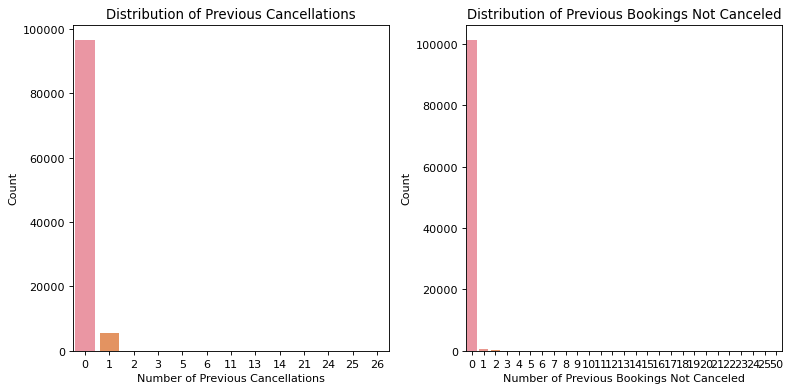

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# Plot the distribution of previous_cancellations
sns.countplot(x='previous_cancellations', data=d, ax=axs[0])
axs[0].set_title('Distribution of Previous Cancellations')
axs[0].set_xlabel('Number of Previous Cancellations')
axs[0].set_ylabel('Count')

# Plot the distribution of previous_bookings_not_canceled
sns.countplot(x='previous_bookings_not_canceled', data=d, ax=axs[1])
axs[1].set_title('Distribution of Previous Bookings Not Canceled')
axs[1].set_xlabel('Number of Previous Bookings Not Canceled')
axs[1].set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

We can see from the plots above that there is a serious imbalance in data of both `previous_cancellations` and `previous_bookings_not_canceled`, so it is better to drop these two columns.

In [16]:
# Delete booking_changes，adr, arrival_date_year,arrival_date_day_of_month, previous_cancellations and previous_bookings_not_canceled
d.drop(['booking_changes','adr','arrival_date_year',\
        'arrival_date_day_of_month','previous_cancellations', \
        'previous_bookings_not_canceled'],axis =1,inplace=True)

Now we are good to explore the data. We first look at the distribution of guests' countries of origin. The map plot indicates that most of the guests are from Portugal and other countries in Europe.

In [66]:
# Source Country
country_source = d[d['is_canceled'] == 0]['country'].value_counts().reset_index()
country_source.columns = ['Country', 'Guests number']
guest_map = px.choropleth(country_source,
                    locations=country_source['Country'],
                    color=country_source['Guests number'],
                    hover_name=country_source['Country'],
                    color_continuous_scale=px.colors.sequential.Agsunset,
                    title="Source Country of the guests",
                    width=600,
                    height=600)
guest_map.show()

Then we draw plots of other important categorical variables by cancellation. We can see from the plots that some of the variables seem more likely to explain the cancelation status. Bookings from city hotels are more likely to be canceled than resort hotels. There is more chance of cancellations related to the Bookings associated to a group. As for different assigned room types, room type A has a higher probability of cancellation. Comparing different deposit types, customers prefer to choose hotels with no deposit required. However, when the hotel deposit is non-refundable, most customers still choose to preserve, perhaps indicating that the hotel deposit type does not affect the cancellation status that much.

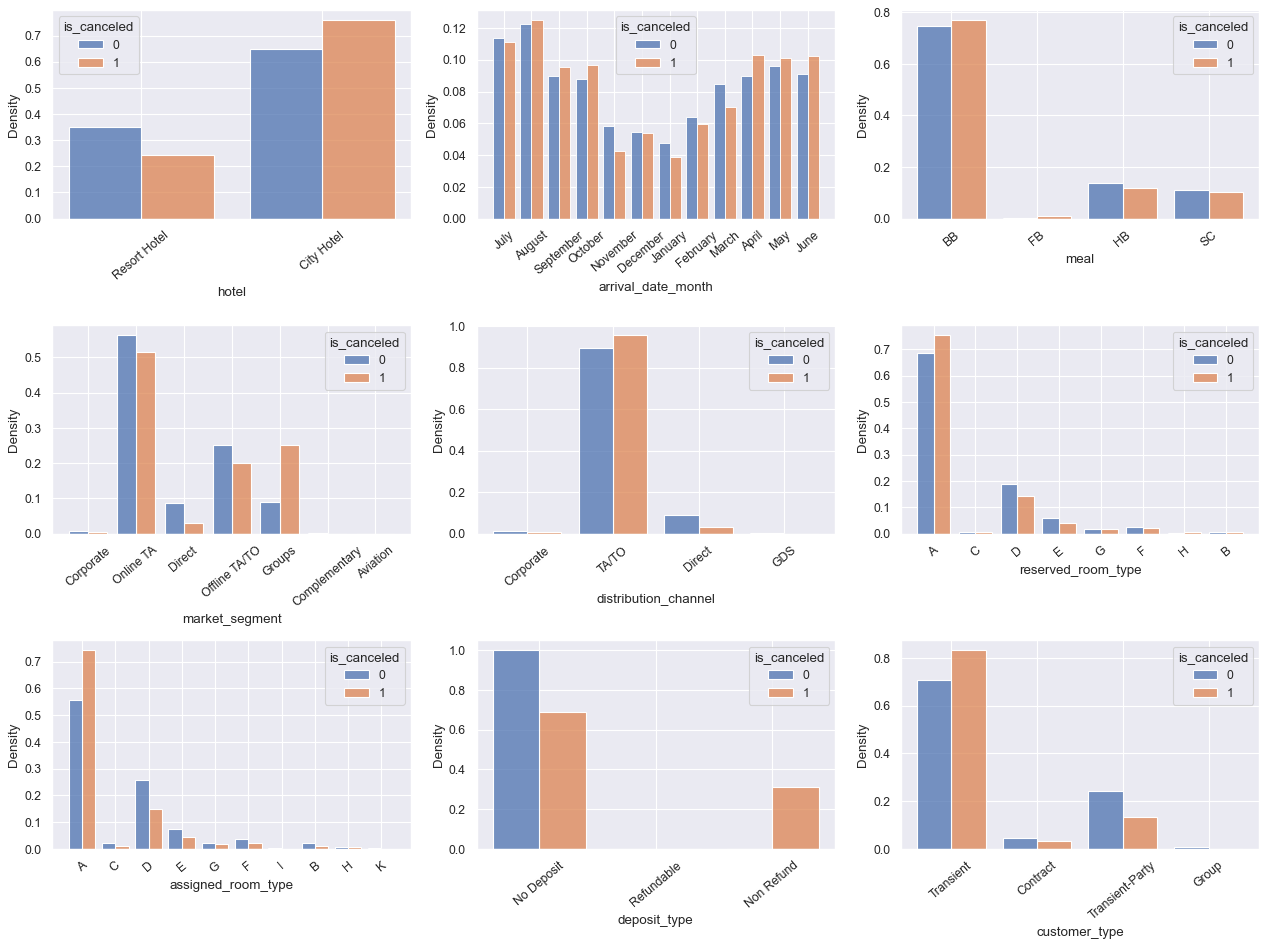

In [18]:
plt.rcParams['figure.autolayout'] = True
# Categorical variables by Cancellation
sns.set(style="darkgrid")
fig, ax = plt.subplots(ncols = 3, nrows =3, figsize = (16, 12))
ax = ax.ravel()
cate_cols = d.select_dtypes(["object", "category"]).columns 
# arrival_date_year is meaningless, country and agent are too much
cate_cols = [cols for cols in cate_cols if cols not in \
             ['arrival_date_year','country','agent']]

for i in range(len(cate_cols)):
    g = sns.histplot(x = cate_cols[i], hue="is_canceled", \
                     multiple="dodge", data = d, ax = ax[i],\
                     stat = 'density', shrink = 0.8, \
                     common_norm=False)
    for item in g.get_xticklabels():
        item.set_rotation(40)
    g

Next, we plot some of the numerical variables that do show some correlation with cancellation status. We can see that bookings with longer lead time are more likely to be cancelled.

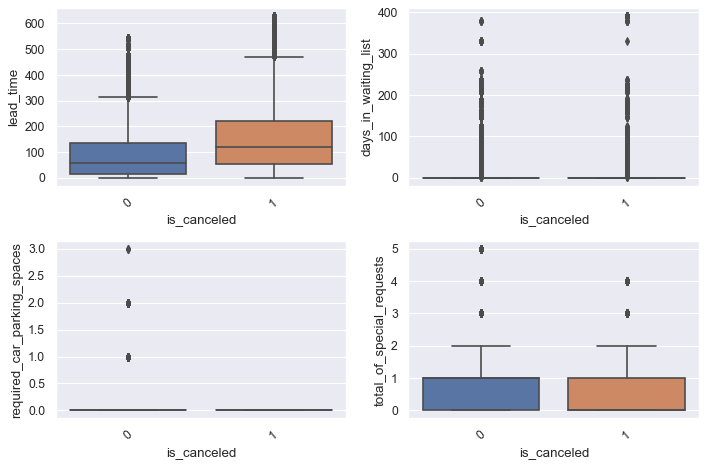

In [19]:
# Numerical variables by Cancelation
sns.set(style="darkgrid")
fig1, ax1 = plt.subplots(ncols = 2, nrows =2, figsize = (9, 6))
ax1 = ax1.ravel()
nume_cols = ['lead_time','days_in_waiting_list',\
             'required_car_parking_spaces','total_of_special_requests']

for i in range(len(nume_cols)):
    g = sns.boxplot(y=nume_cols[i], x = "is_canceled", data = d, \
                    ax = ax1[i])
    for item in g.get_xticklabels():
        item.set_rotation(40)
    g

Focus more on the variable `lead time`, we can see that when the lead time grows, the number of people who choose to cancel increases.

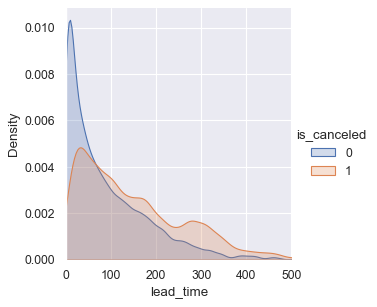

In [20]:
# Density Curve of Lead Time by Cancelation
sns.set(style = "darkgrid")
sns.FacetGrid(d, hue = 'is_canceled',height = 4,\
              xlim = (0,500)).map(sns.kdeplot,\
                                  'lead_time', shade = True).add_legend()

Look at the plot of guests number by month, we can find that July and August have the highest number of guests, indicating that this is the peak period of the year.

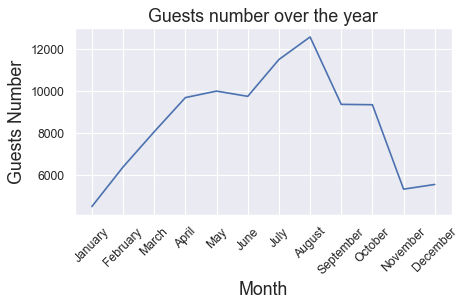

In [21]:
# Guests number by month
guests_num = d['arrival_date_month'].value_counts().reset_index()
guests_num.columns=['Month','Guests Number']

# Sort by month
ordered_months = ['January', 'February', 'March', 'April', 'May',
                  'June', 'July', 'August', 'September', 
                  'October', 'November', 'December']
guests_num['Month'] = pd.Categorical(guests_num['Month'], \
                                     categories=ordered_months, ordered=True)

sns.set(style = "darkgrid")
plt.figure(figsize=(6, 4))
sns.lineplot(x = 'Month', y='Guests Number', data=guests_num, ci='sd')
plt.title("Guests number over the year", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Guests Number", fontsize=16)
plt.show()

Finally, let's see the heatmap to check the correlations between all the variables.

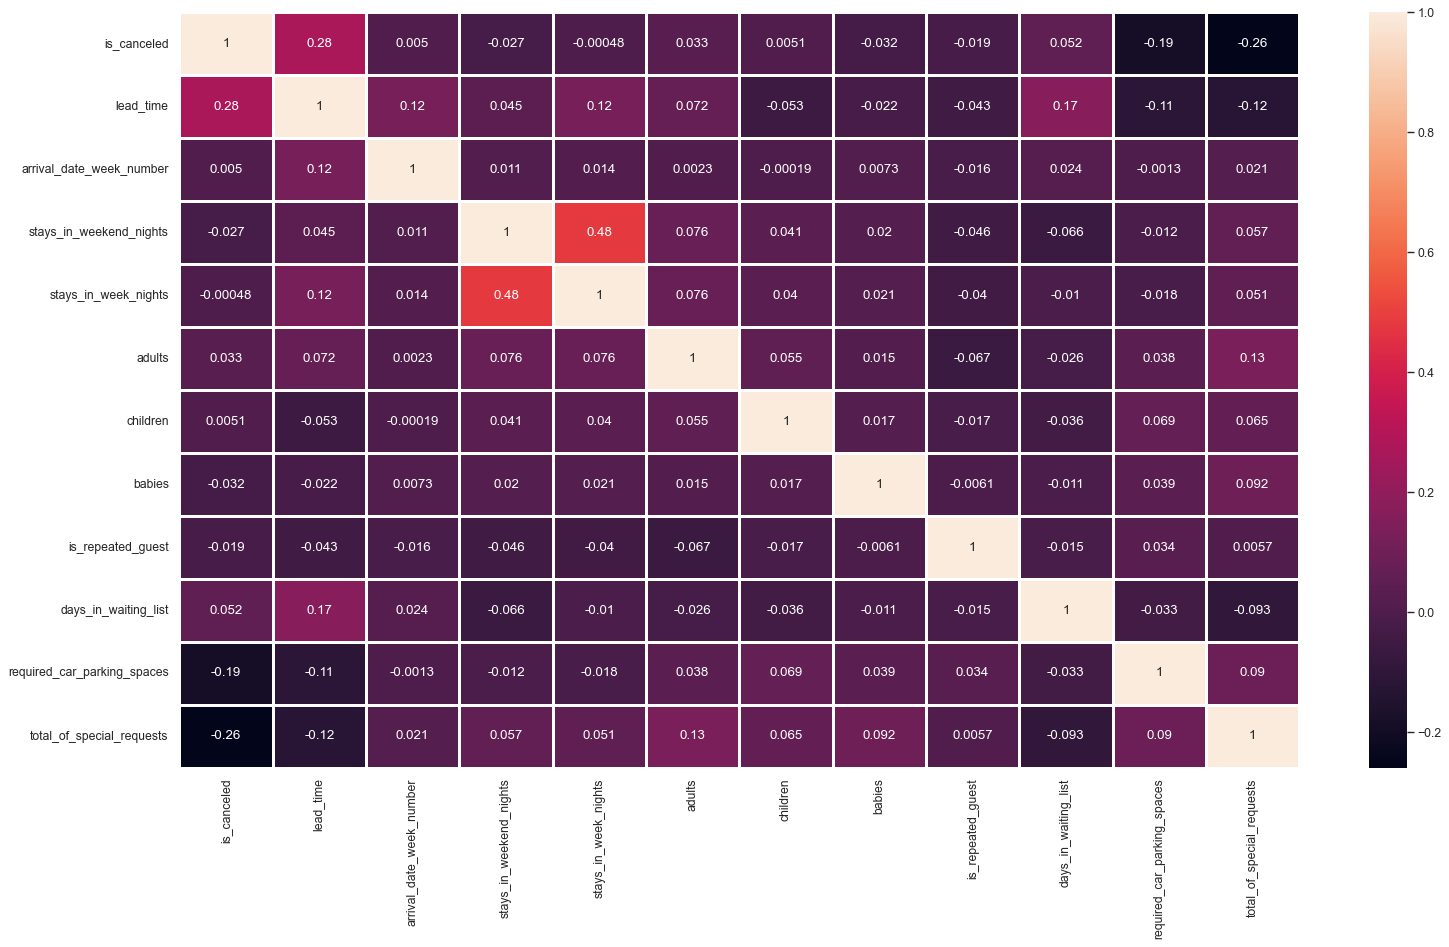

In [22]:
# heatmap
plt.figure(figsize = (20, 12))
sns.heatmap(d.corr(), annot = True, linewidths = 1)
plt.show()

Then we check which numerical features are most important.

In [23]:
# Correlation with is_canceled
cancel_corr = d.corr()['is_canceled'].sort_values(ascending = False)
cancel_corr

is_canceled                    1.000000
lead_time                      0.275865
days_in_waiting_list           0.052341
adults                         0.033481
children                       0.005059
arrival_date_week_number       0.004972
stays_in_week_nights          -0.000476
is_repeated_guest             -0.019260
stays_in_weekend_nights       -0.026807
babies                        -0.032322
required_car_parking_spaces   -0.189630
total_of_special_requests     -0.259225
Name: is_canceled, dtype: float64

From the output we can see that `lead_time` has a moderate positive correlation with `is_canceled`, `total_of_special_requests` and `required_car_parking_spaces` have a moderate negative correlation with `is_canceled`, these three variables may be the most important numerical features.
We will also not include days_in_waiting_list and arrival_date_year.

### Feature Engineering

For now, after some basic data preprocessing, there are now no unreasonable values in the dataset and all variables should play a role in the final classification result. However, we believe that it is possible to combine certain variables and obtain new variables that can contain information from the old ones and can provide a fresh perspective on the interpretation of the dataset.

Firstly, focus on the number of adults, children and babies. In fact, these three variables only contain information on the number of people in each, so we decided to calculate the ratio of the number of adults to the number of children and infants separately. Since the number of adults is at least one, we use the number of adults as the denominator and calculate two new variables to replace the three previous ones.

In [24]:
d['CA_ratio']=d['children']/d['adults']
d['BA_ratio']=d['babies']/d['adults']
d.drop(['adults','children','babies'],axis =1,inplace=True)

Then, there are two variables `reserved_room_type` and `assigned_room_type` should be mentioned. From the interpretation of those two varibales, they are codes for room type, but  there may be a situation where the type of room booked and the type of room actually allocated are not the same, so we thought it necessary to use a new variable to indicate whether the type of room booked is the same as the one allocated. We use the simplest allocation of 01, where 1 indicates that the room booked is the same as the one allocated, and 0 indicates the opposite.

In [25]:
#Create a column indicating whether the type of room booked is the same as the one allocated
def reserved_assigned(reserved_code,assigned_code):
    return 1 if reserved_code==assigned_code else 0

d['room_type_same']=d.apply(lambda row: reserved_assigned\
                            (row['reserved_room_type'],\
                             row['assigned_room_type']),axis=1)
d.reset_index(drop=True,inplace=True)

Now, have a look at the variables and find out which variable belong to categorical variable and which one belongs to continuous variable.

In [26]:
print('Categorical variables:',[feature for feature \
                                in d.columns if d[feature].dtype=='object'],'\n')
print('Continuous variables:',[feature for feature in \
                               d.columns if d[feature].dtype!='object'])

Categorical variables: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'customer_type'] 

Continuous variables: ['is_canceled', 'lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'CA_ratio', 'BA_ratio', 'room_type_same']


First, we plan to explore the categorical data further and try to transform the variables according to their practical significance.In our view, the most notable variables are `arrival_date_month`, `country` and `agent`. The following will discuss each of them in detail.

- `arrival_date_month` (change to `seasons`)  
For this variable, it indicates month of arrival date, so there are 12 distinct values from January to December. In our view, for the hospitality industry, the quarterly impact is much greater than the actual month. For example, the data relating to the hospitality industry do not show a huge difference between January and February, but the difference between January and August figures is much more pronounced. We therefore decided to divide these 12 months by season, with December to February being winter, March to May being spring, June to August being summer and September to November being autumn, and changed the variable to `seasons`.

In [27]:
#For discrete variables
#arrival_date_month by season
d['arrival_date_month'].replace(['March', 'April', 'May'],'Spring',inplace=True)
d['arrival_date_month'].replace(['June', 'July', 'August'],'Summer',inplace=True)
d['arrival_date_month'].replace(['September', 'October', 'November'],'Autumn',inplace=True)
d['arrival_date_month'].replace(['December', 'January', 'February'],'Winter',inplace=True)
d.rename({'arrival_date_month':'seasons'},axis=1,inplace=True)

- `country `   
`country` represents the country of origin for each customer. In general, in the dataset we can find travellers coming from all over the world. From the exploration of the dataset in the EDA section it is known that there are a total of 174 countries, so it is also important to know how to deal with them, as such a large number of categories would introduce a large number of new columns when coding, which could seriously affect the effectiveness of the model. At the same time, many of the countries, especially on the European continent, border each other. They share similar cultures and scripts. We felt that differentiation according to different countries seemed somewhat unnecessary, so we decided to classify the different countries according to the continent on which they are located.  
To deal with such problem, we need a package called **pycountry**. By using this package,we can transform country's name to corresponding continent. However, according to the description of assignment, country categories are represented in the ISO 3155–3:2013 format, and this package provides support for ISO 3166 format, so there may has some problems on matching. So first define a function to transform countries to continent.

In [28]:
#define function to convert country's name to related continent
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

Try all countries to see which one the package cannot process.

In [29]:
for i in np.unique(d['country']):
    try:
        country_to_continent(i)
    except:
        print(i)

ATA
ATF
CN
TMP
UMI


Therefore, modify those countries that have problem.  
- ATA indicates **Antarctica**, no alternative code was found in ISO 3166 and given the extremely low frequency of occurrence in this region, all data including ATA was removed.
- ATF is short for **French Southern Territories**, so just change it to FRA (France).
- CN is the alpha-2 code for China, so first change it to **CHN**. Then, noted that Taiwan, HongKong and Macau are all Chinese territories, they cannot be treated as country, so change them to **CHN** as well.
- TMP remove it because it is invalid now.
- UMI indicates **United States Minor Outlying Islands**, so change it to **USA**

In [30]:
d['country'].replace(['CN','TWN','HKG','MAC'],'CHN',inplace=True)
d['country'].replace('ATF','FRA',inplace=True)
d['country'].replace('UMI','USA',inplace=True)
d.drop(d[d['country']=='ATA'].index,inplace=True)
d.drop(d[d['country']=='TMP'].index,inplace=True)

d['continent']=d['country'].apply(country_to_continent)
d.drop(['country'],axis =1,inplace=True)
d.reset_index(drop=True,inplace=True)

- `agent`  
This represents ID of the travel agency that made the booking. There are a total of 332 different agents in the dataset, so we need to transform these agents appropriately, otherwise too many labels will affect the effectiveness of the final model. By looking at the data we labelled the agents that appeared more frequently than 10% as large agents, as they held the most market share. Those with frequencies between 1% and 10% were labelled as medium-sized agents, while those with frequencies less than 1% were labelled as small agents.

In [31]:
freq=d['agent'].value_counts()/len(d['agent'])
result=pd.DataFrame(freq)
result.columns=['proportion']
result.head()

,proportion
9,0.310153
240,0.134595
1,0.070363
14,0.035265
7,0.034422


In [32]:
#agent by frequency
dic={'large':[],'middle':[],'small':[]}#
for i in range(len(freq)):
    if freq[i]>=0.1:
        dic['large'].append(freq.index[i])
    elif freq[i]>=0.01:
        dic['middle'].append(freq.index[i])
    else:
        dic['small'].append(freq.index[i])

d['agent'].replace(dic['large'],'large',inplace=True)
d['agent'].replace(dic['middle'],'middle',inplace=True)
d['agent'].replace(dic['small'],'small',inplace=True)

Having dealt with the categorical variables, the next step is to look at the continuous variables and make some adjustments to the data.
- `lead_time` is the number of days that elapsed between the entering date of the booking into the PMS and the arrival date. We suggest that converting this continuous variable to categorical variable is better, because: firstly, the outcome is binary, so there is difficult to find a linear relationship between lead_time and outcome variable. Then, Categorical variables can be more easily interpreted by non-experts, making them useful for communication and reporting purposes.  
The method we use is to convert the continuous variable into a categorical variable by dividing the data into intervals or bins. After converting, we can set there are three bins in lead_time, which represent short, medium and long days that elapsed between the entering date of the booking into the PMS and the arrival date.  
- `arrival_date_week_number` is Week number of year for arrival date. In fact, even though this variable has 53 unique values, the variable `seasons` actually can cover most of values. Therefore, we decided to set the week number 51,52 and 53 to be holiday (just roughly estimate), then this variable can be transformed to a new variable `holiday_or_not` that indicates holiday.
- `stays_in_weekend_nights` and `stays_in_week_nights` represent number of weekend/weekday nights the guest stayed or booked to stay at the hotel. As the same reason in `lead_time`, convert them into 3 categories: short, medium and long.
- `days_in_waiting_list` indicates number of days the booking was in the waiting list before it was confirmed to the customer, and convert it into 3 categories: short, medium and long.
- `required_car_parking_spaces` and `total_of_special_requests` are two similar variables that only have several unique values. The values of two variables represent just one case, and given that there are not many unique values, it is perfectly possible to treat them as discrete variables.

In [33]:
# for continuous variables
# lead_time is divided by interval and becomes discrete
d['lead_time']=pd.cut(d['lead_time'], 3, retbins=True,labels=['short','medium','long'])[0]

In [34]:
#arrival_date_week_number 51, 52, 53 weeks as holiday
d['arrival_date_week_number'].replace([51,52,53],\
                                      'holiday',inplace=True)
d['arrival_date_week_number'].replace(list(range(1,51)),\
                                      'non-holiday',inplace=True)
d.rename({'arrival_date_month':'seasons'},axis=1,inplace=True)

In [35]:
#stays_in_weekend_nights, stays_in_week_nights by interval
d['stays_in_weekend_nights']=pd.cut(d['stays_in_weekend_nights'],\
                                    3, retbins=True,labels=['short','medium','long'])[0]
d['stays_in_week_nights']=pd.cut(d['stays_in_week_nights'], \
                                 3, retbins=True,labels=['short','medium','long'])[0]

In [36]:
#days in waiting list by interval
d['days_in_waiting_list']=pd.cut(d['days_in_waiting_list'],\
                                 3, retbins=True,labels=['short','medium','long'])[0]

In [37]:
#required_car_parking_spaces and total_of_special_requests changed to string
d['required_car_parking_spaces'] = d['required_car_parking_spaces'].apply(str)
d['total_of_special_requests'] = d['total_of_special_requests'].apply(str)

In [38]:
d2 = d.copy()

In [39]:
d2

,is_canceled,hotel,lead_time,seasons,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,meal,market_segment,distribution_channel,...,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,CA_ratio,BA_ratio,room_type_same,continent
0,0,Resort Hotel,short,Summer,non-holiday,short,short,BB,Corporate,Corporate,...,No Deposit,small,short,Transient,0,0,0.0,0.0,1,Europe
1,0,Resort Hotel,short,Summer,non-holiday,short,short,BB,Online TA,TA/TO,...,No Deposit,large,short,Transient,0,1,0.0,0.0,1,Europe
2,0,Resort Hotel,short,Summer,non-holiday,short,short,BB,Online TA,TA/TO,...,No Deposit,large,short,Transient,0,1,0.0,0.0,1,Europe
3,0,Resort Hotel,short,Summer,non-holiday,short,short,FB,Direct,Direct,...,No Deposit,small,short,Transient,0,1,0.0,0.0,1,Europe
4,1,Resort Hotel,short,Summer,non-holiday,short,short,BB,Online TA,TA/TO,...,No Deposit,large,short,Transient,0,1,0.0,0.0,1,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102109,0,City Hotel,short,Summer,non-holiday,short,short,BB,Offline TA/TO,TA/TO,...,No Deposit,small,short,Transient,0,0,0.0,0.0,1,Europe
102110,0,City Hotel,short,Summer,non-holiday,short,short,BB,Online TA,TA/TO,...,No Deposit,large,short,Transient,0,2,0.0,0.0,1,Europe
102111,0,City Hotel,short,Summer,non-holiday,short,short,BB,Online TA,TA/TO,...,No Deposit,large,short,Transient,0,4,0.0,0.0,1,Europe
102112,0,City Hotel,short,Summer,non-holiday,short,short,BB,Online TA,TA/TO,...,No Deposit,small,short,Transient,0,0,0.0,0.0,1,Europe


The final step is encoding. In the previous process of feature engineering, we transformed the categorical and continuous variables to obtain a more logical categorical variable. Therefore, it is straightforward to apply the one-hot encoding.

In [40]:
feature_cat=[feature for feature in d.columns if \
             (d[feature].dtype=='object') or (d[feature].dtype=='category')]

In [41]:
#onehot encoding
one = OneHotEncoder()
transformed=pd.DataFrame(one.fit_transform(d[feature_cat]).toarray())
transformed.columns=one.get_feature_names_out()
d=pd.concat([d,transformed],axis=1).drop(feature_cat,axis=1)

## 3. Model Fitting and Tuning

### 3.1 Data processing

After feature engineering, we obtained a sample and set 'is_canceled' as the target variable and the other variables as covariates to train the model.

In [42]:
X = d.drop(columns=['is_canceled'])
y = d['is_canceled']

Then we examined the distribution of the target variable and found it to be unevenly distributed. Therefore, we used undersampling to make the number of targets equal. In order to avoid certain feature columns having a greater impact on the model due to their large numerical range, we standardized the data between different continuous feature columns to the same order of magnitude. Then we used train_test_split and set the random seed to 42 to split the data into training and testing sets.

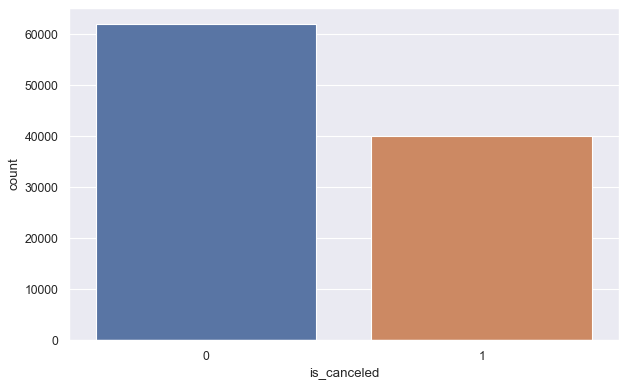

In [43]:
sns.countplot(x=d['is_canceled'])
plt.show()

In [44]:
# under sampling keep the number of target same
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
# scale the continous variable
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
# split the dataset
X_train, X_test, y_train, y_test= train_test_split(X_resampled, 
                                                   y_resampled, 
                                                   test_size=0.2, 
                                                   stratify=y_resampled,
                                                   random_state=42)

We can observe that the training set consists of 64078 data points, while the test set consists of 16020 data points. 83 features are used as covariates.

In [45]:
X_train.shape,X_test.shape

((64078, 83), (16020, 83))

### 3.2 Baseline model

For the data modeling, as a binary classification problem, we considered logistic regression, support vector machine, decision tree, and KNN as baseline models, and below we present the drawbacks of these methods.

#### Logistic regression

In the case of a large number of features, logistic regression may experience overfitting. The model may become too complex and capture the noise in the training data, resulting in a decrease in generalization performance on the test data.

#### SVM

For support vector classifiers, the computational complexity of SVC is proportional to the number of training samples and the number of features. When faced with over 60,000 data points and nearly 100 features, the computational complexity can be very high. This results in long training times and requires significant computing resources. In actual model testing, the model had to be terminated due to its lengthy execution time. Additionally, the interpretability of the SVC model is poor, especially when using nonlinear kernel functions, which is not suitable for this project.

#### Decision tree

When faced with a large number of features, decision trees are prone to overfitting, especially when the depth of the tree is large. In addition, the process of generating decision trees is greedy, so it may choose locally optimal split points at each node, leading to the inability to find the global optimal solution, which may affect the predictive performance of the model.

#### KNN

The KNN algorithm requires calculating the distance between the test sample and all training samples. When the data volume is large and the number of features is close to 100, the computational complexity will significantly increase, leading to long training time. In addition, for high-dimensional data problems, KNN may be affected by the "curse of dimensionality". As the dimension increases, the distance between samples becomes more and more similar, which can lead to a decrease in the performance of the KNN algorithm.

### 3.3 Model selection and comparision

#### Random forest

The most suitable model for this dataset is a random forest model. Random forest works by constructing multiple decision trees and averaging or voting their prediction results. For a large number of features, it can effectively reduce the risk of overfitting. In addition, random forests typically have higher prediction accuracy because they combine the prediction results of multiple decision trees. By voting the outputs of different decision trees, random forest can reduce the variance of the model, thereby improving prediction performance. Importantly, random forest can provide a measure of feature importance, which helps identify features that have a significant impact on the prediction results. This improves the interpretability of the model and helps us identify the most important features for 'is_cancel'.

#### Comparision

From the figure below, we can observe the results of different models. Regardless of accuracy or f1 value (which is the average of precision and recall), the Random Forest model is the highest. Additionally, this model has the lowest number of incorrect predictions classified as positive or negative.

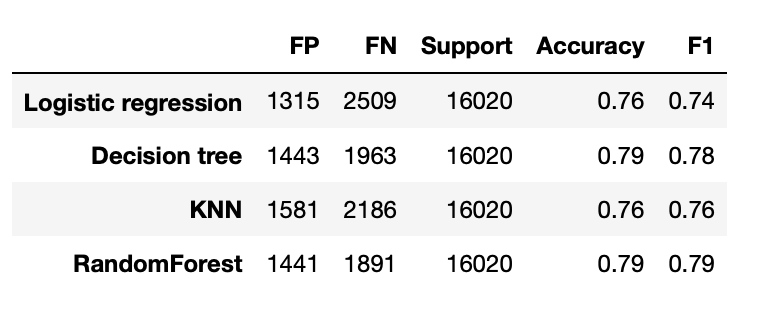

In [46]:
Image(filename='model eval.png',width=400, height=300)

### 3.4 Model tuning

In this section, I will describe the tuning of the model to find the best parameters and evaluate the model in terms of different metrics. First, I will introduce the role of the following three helper functions.
- `model_eval`: evaluate the performance of a given model on a test set and return a DataFrame containing metric values. The metrics include False Positive, False Negative, Support (number of samples), Accuracy, and F1-Score.
- `cv_score`: Calculate the accuracy and F1 score of a given model on a dataset, perform cross-validation, and provide the mean values.   
- `plot_auc`: Draw the ROC curve of the given model on the test set and calculate its AUC value.
- `plot_importance`: Draw a feature importance plot for the given model to demonstrate the degree of importance of each feature on the model's predicted outcomes.
- `find_top_feat`: Train a random forest classifier using K-fold cross-validation. For each fold, the code will train a random forest classifier with 200 decision trees and use its feature importance metric to select the most important features until their cumulative importance proportion is greater than or equal to 0.6. Then, it stores the names of the most important features in each classifier in a DataFrame and concatenates the results of all folds.
- `plot_cancel_rate`: Draw the impact of a specified column col_name in the given dataset, on the cancellation rate.

In [47]:
def model_eval(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred).ravel()
    fp = cm[1]
    fn = cm[2]
    support = cm.sum()
    acc = accuracy_score(y_test, y_pred).round(2)
    f1 = f1_score(y_test, y_pred).round(2)
    eval_df = pd.DataFrame({'FP':[fp],'FN':[fn],
                            'Support':[support],'Accuracy':[acc],
                            'F1':[f1]},index=[model_name])
    return eval_df

In [48]:
def cv_score(model):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = cross_val_score(model, X_resampled, y_resampled, \
                                cv=kfold, scoring='f1_macro')
    accuracy_scores = cross_val_score(model, X_resampled, y_resampled, \
                                      cv=kfold, scoring='accuracy')
    df = pd.DataFrame({'Accuracy':accuracy_scores,'f1':f1_scores})
    mean_row = df.mean(axis=0)
    df.loc['mean'] = mean_row
    return df

In [49]:
def plot_auc(model):
    y_pred = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # draw the graph
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Graph')
    plt.legend(loc="lower right")
    plt.show()

In [50]:
def plot_importance(model,n):
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]
    top_n = n
    plt.figure()
    plt.title("Feature Importances (Top {})".format(top_n))
    plt.bar(range(top_n), importances[indices[:top_n]])
    plt.xticks(range(top_n), X.columns[indices[:top_n]], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.show()

In [51]:
def find_top_feat():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    df = pd.DataFrame()
    i = 1
    for train_index, test_index in kfold.split(X_resampled):
        X_train, X_test = X_resampled[train_index], X_resampled[test_index]
        y_train, y_test = y_resampled[train_index], y_resampled[test_index]

        rf_clf_best = RandomForestClassifier(n_estimators = 200)
        rf_clf_best.fit(X_train, y_train)

        importances = rf_clf_best.feature_importances_
        indices = importances.argsort()[::-1]
        prefix_sum = np.cumsum(sorted(importances, reverse=True))
        n =  np.argmax(prefix_sum > 0.6) + 1 
        im_dic = dict(zip(X.columns[indices[:n]],
                          importances[indices[:n]].round(3)))
       
        top_n_feat = pd.DataFrame(X.columns[indices[:n]],columns=[f'cv{i}'])
        df = pd.concat([df, top_n_feat], axis=1)
        i = i + 1

    return df

In [52]:
def plot_cancel_rate(dataset,col_name, if_bar = True):
    cancel_data = dataset.groupby(col_name)["is_canceled"].describe()
    if if_bar == False:
        sns.regplot(x=cancel_data.index, y=cancel_data["mean"].values *100)
    else:
        sns.barplot(x=cancel_data.index, y=cancel_data["mean"]*100)
    plt.title(f"Effect of {col_name} on cancelation", fontsize=10)
    plt.xlabel(col_name, fontsize=12)
    plt.ylabel("Cancelations [%]", fontsize=12)

Using a grid search with a random forest classifier to find the best combination of hyperparameters, which include n_estimators (the number of decision trees), max_depth (the maximum depth of the decision trees), and max_features (the maximum number of features used by each decision tree). The grid search uses 5-fold cross-validation and evaluates the performance of the model using the macro-average of f1 score as the scoring metric. We can see that the model works best when n_estimators=200, max_features=5, and max_depth is the default value.

In [53]:
param_grid = {'n_estimators': [100, 200], \
              'max_depth': [5, 10,None]
             }

# grid search for best parameter
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid = param_grid,
                           cv = KFold(5, shuffle = True, random_state = 42),
                           scoring='f1_macro')
grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

In [54]:
# output the best score and parameter
print('Best parameters:', grid_search.best_params_)
print('Best F1 score:', grid_search.best_score_)

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best F1 score: 0.7921422980329934


Fit the training set with the optimal parameters found and evaluate the model. The overview of the model can be found in the discussion section below.

In [55]:
rf_clf_best = RandomForestClassifier(n_estimators = 200,random_state=42)
rf_clf_best.fit(X_train, y_train)

eval_best = model_eval(rf_clf_best, 'RandomForest')
eval_best

,FP,FN,Support,Accuracy,F1
RandomForest,1425,1909,16020,0.79,0.79


Cross-validation yields an accuracy and f1 value of around 0.8 for the model, indicating that the model has good performance.

In [56]:
cv_score(RandomForestClassifier(n_estimators = 200,random_state=42))

,Accuracy,f1
0,0.789326,0.789200
1,0.793134,0.793068
2,0.793883,0.793775
3,0.794307,0.794277
4,0.790686,0.790392
mean,0.792267,0.792142


The following figure is a ROC curve, where the AUC value is close to 0.8 and the curve is close to the upper left corner, indicating that the performance of the classifier is great.

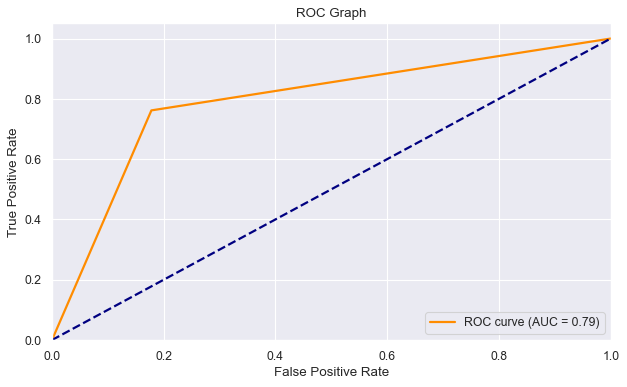

In [57]:
plot_auc(rf_clf_best)

The feature importance of different variables is visualized in the following figure, and the detailed explanation of this section will be provided next.

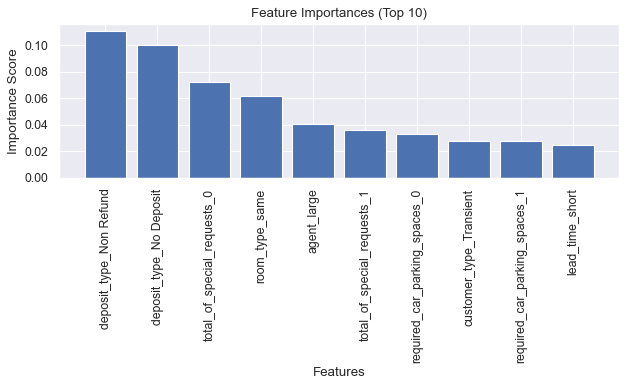

In [58]:
plot_importance(rf_clf_best,10)

The table below shows the characteristics of greater importance for the five cross-validations.

In [59]:
imp_df = find_top_feat()
imp_df

,cv1,cv2,cv3,cv4,cv5
0,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_No Deposit,deposit_type_No Deposit,deposit_type_Non Refund
1,deposit_type_Non Refund,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Non Refund,deposit_type_No Deposit
2,total_of_special_requests_0,total_of_special_requests_0,total_of_special_requests_0,total_of_special_requests_0,total_of_special_requests_0
3,room_type_same,room_type_same,room_type_same,room_type_same,room_type_same
4,agent_large,agent_large,agent_large,agent_large,agent_large
5,total_of_special_requests_1,total_of_special_requests_1,required_car_parking_spaces_0,total_of_special_requests_1,required_car_parking_spaces_0
6,required_car_parking_spaces_0,required_car_parking_spaces_0,total_of_special_requests_1,required_car_parking_spaces_1,total_of_special_requests_1
7,required_car_parking_spaces_1,required_car_parking_spaces_1,required_car_parking_spaces_1,required_car_parking_spaces_0,required_car_parking_spaces_1
8,customer_type_Transient,customer_type_Transient,customer_type_Transient,customer_type_Transient,customer_type_Transient
9,market_segment_Groups,CA_ratio,customer_type_Transient-Party,lead_time_short,CA_ratio


Combining all the features that have appeared and finding the unique value, then deleting nan, we can obtain the features to be analysed:
- `deposit_type`
- `total_of_special_requests`
- `room_type_same`
- `agent`
- `required_car_parking_spaces`
- `customer_type`
- `lead_time`
- `market_segment`
- `CA_ratio`

Below shows the result of the correlation bewteen the important features and outcome variable `is_canceled`. From the results, we can roughly find the correlation bewteen each variablea and response, find the direction of these variables.

In [61]:
feat_list = list(pd.unique(imp_df.values.ravel()))
#feat_list.remove(np.nan)
cor_list = []
for i in feat_list:
    correlation = d['is_canceled'].corr(d[i])
    cor_list.append(correlation)
dict(zip(feat_list,cor_list))

{'deposit_type_No Deposit': -0.4616579136059169,
 'deposit_type_Non Refund': 0.46210155398136393,
 'total_of_special_requests_0': 0.2930856069505236,
 'room_type_same': 0.23992414272295662,
 'agent_large': 0.03436009411177046,
 'total_of_special_requests_1': -0.21107299513309377,
 'required_car_parking_spaces_0': 0.19020180961496372,
 'required_car_parking_spaces_1': -0.18977532121740107,
 'customer_type_Transient': 0.14332263964649067,
 'market_segment_Groups': 0.21854143908998536,
 'CA_ratio': 0.002137018912552232,
 'customer_type_Transient-Party': -0.13027441879559928,
 'lead_time_short': -0.20861141251207316,
 'agent_middle': -0.029546912321240466,
 'market_segment_Online TA': -0.047397566729645055}

In the next part, I draw a histogram of the cancellation rates for different values of the selected variables.

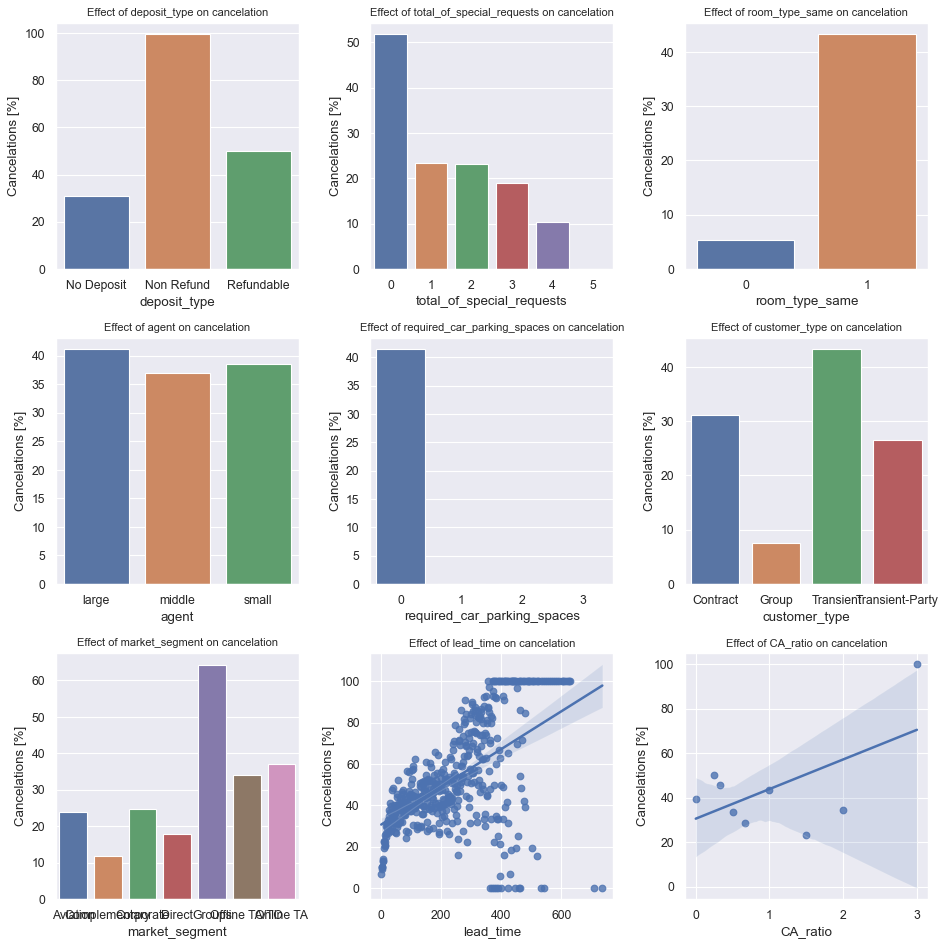

In [62]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)
subplots = [(331, "deposit_type"), (332, "total_of_special_requests"), \
            (333, "room_type_same"),(334, "agent"), 
            (335, "required_car_parking_spaces"),\
            (336, "customer_type"), (337, "market_segment"), 
            (338, "lead_time"), (339, "CA_ratio")]
for subplot in subplots:
    plt.subplot(subplot[0])
    if subplot[1] == "lead_time":
        d = pd.read_csv("hotel.csv")
    else:
        d = d2
    plot_cancel_rate(d, subplot[1], 
                     if_bar=(subplot[1] not in ["lead_time", "CA_ratio"]))

## 4. Discussion & Conclusions


### Overview of the model

From the data presented above, we can see that among 16,000 customers, there were 1,425 instances of FP (false positives). In this project, FP refers to cases where customers were wrongly predicted to cancel their orders, but in reality, they did not. This could lead to overbooking of the hotel, affecting customer satisfaction and the hotel's reputation. On the other hand, there were 1,909 instances of FN (false negatives), where customers were wrongly predicted not to cancel their orders, but in reality, they did. This could result in vacant rooms and potential loss of revenue.

The precision of the model represents the proportion of correctly predicted cancellations among all predicted cancellations, while the recall represents the proportion of correctly predicted cancellations among all actual cancellations. Higher precision and recall values respectively indicate fewer overbookings and vacant rooms. To ensure high economic benefits, the hotel needs to balance precision and recall to minimize both the risks of overbooking and vacant rooms. To find the best balance, we optimized the accuracy and F1 score of the best model to approach 0.8. This indicates that the model can effectively help the hotel predict whether or not customers will cancel their bookings.

### Discussion on important features

Based on the result obtained in the previous part, we found that there are several variables that are very important for precdicting a cancelation. Generally speaking, the most important features are deposit type, number of special requests, whether the reseved room type is the same as assigned room type, agent, number of car parking spaces,customer type,lead time, market segment and seasons. The following will briefly discuss the detailed effect on these features:
- If the deposit type is non refund (a deposit was made in the value of the total stay cost), the booking is more likely to be canceled; meanwhile, if the deposit type is no deposit, the booking is less likely to be canceled.
- There is a large difference in the number of special request. We suggest that if the customer booked a room without leaving any special request, the booking is more likely to be canceled, that's probably because the customer has not yet made up his mind to come and visit. Therefore, if the customer provided one special request, the booking is less likely to be canceled.
- If the customer chooses a large agent, the booking is more likely to be canceled; if the customer chooses a middle agent, the booking is less likely to be canceled.

- We found that if the customer booked a room without requiring any car parking spaces, the booking is more likely to be canceled, that's probably because the customer has not yet made up his mind to come and visit. Therefore, if the customer requires one car parking spaces, the booking is less likely to be canceled.
- The customer type is also worth to be mentioned. Based on result, if the booking is not part of a group or contract, and is not associated to other transient booking, which means this customer is just himself/herself, the booking is more likely to be canceled; if the booking is transient, but is associated to at least other transient booking, which means this customer may has a plan to be with his/her friends, then the booking is less likely to be canceled.
- The children-adult ratio is also positivly correlated to cancellation. This means the more children a family has, the more likely they are to cancel the booking, perhaps because there will be more arguments within the family.
- If the number of days that elapsed between the entering date of the booking into the PMS and the arrival date is short, the booking is less likely to be canceled.
- If market segment is Group, the booking is more likely to be canceled; if market segment is Online Travel Agents, the booking is less likely to be canceled.

## 5. References

*In this section, you should present a list of external sources (except the course materials) that you used during the project, if any*

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://www.sciencedirect.com/science/article/pii/S2352340918315191
- https://pypi.org/project/pycountry/